# Asentiamiento superficial - Método empírico

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad as intg

El máximo asentamiento a la altura del eje del túnel (Smax) se calcula como función de el porcentaje de pérdida de suelo por metro de túnel (Vl), el area de la sección transversal del túnel (At), la distancia al punto de inflexión del perfil de asentamiento (i) y la profundidad del hastial del tunel (zo).
<img src="transversal.jpg" style="width:400px"/>
El porcentaje de pérdida de suelo (Vl) depende de varios factores, principalmente la tipología del suelo, del método constructivo y el control de excavación. Dependiendo de el grado de control de suelo, según Mair dicho valor puede variar entre: control deficiente (1%) y control eficiente (0.25%). Sin embargo el propio Mair en otras publicaciones propone variaciones entre 0.2 y 3%.
<img src="volume_loss.jpg" style="width:400px"/>

In [2]:
Vl=0.01 #porcentaje de pérdida de suelo

Hay distintos procedimientos para calcular la distancia al punto de inflexión de la curva de asentamiento (i). El más simple consiste en adoptar una función lineal dependiente de la profundidad del hastial (zo) y un parámetro que depende del tipo de suelo (K). Dicho parámetro varía entre 0.5 para suelos predominantemente cohesivos y 0.25 para suelos predominantemente granulares.
<img src="inflexion.jpg" style="width:600px"/>

In [3]:
zo=20. #profundidad de la clave (m)
K=0.25 #coeficiente dependiente del tipo de suelo
i=K*zo #distancia al punto de inflexión (m)
print("i=",i,"m")

i= 5.0 m


Definiendo el area de la sección transversal (At), podemos calcular el máximo asentamiento a la altura del eje (Smax)

In [4]:
At=25. #area de la sección transversal (m2)
Smax=0.4*Vl*At/i # máximo asentamiento a la altura del eje
print("Smax=",Smax,"m")

Smax= 0.02 m


Una vez conocido el asentamiento máximo, se puede estimar el perfil de asentamientos (Sv) a lo largo de una linea transversal al eje del túnel (y).

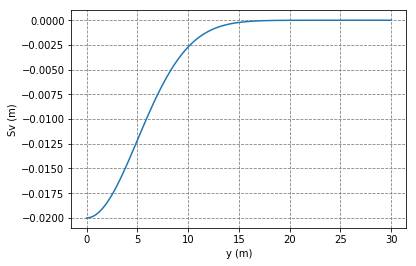

In [5]:
y=np.linspace(0.0, 30.0, num=100)
Sv=Smax*np.exp(-(y**2)/(2*i**2))
plt.plot(y,-Sv)
plt.xlabel('y (m)')
plt.ylabel('Sv (m)')
plt.grid(color='grey', linestyle='--')

A partir de los asentamientos superficiales se pueden calcular los desplazamientos horizotales en superficie (Sh) en función de la distancia al eje (y) y la profundidad del hastial (zo)

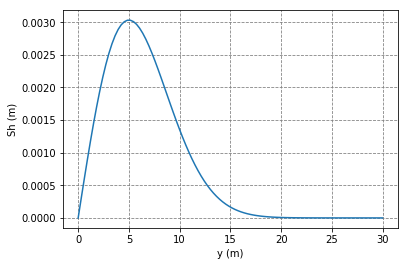

In [6]:
Sh=Smax*np.exp(-(y**2)/(2*i**2))*y/zo
plt.plot(y,Sh)
plt.xlabel('y (m)')
plt.ylabel('Sh (m)')
plt.grid(color='grey', linestyle='--')

Conociendo los desplazamientos horizontales podemos calcular las deformaciones específicas horizontales (eh), derivando la función. En este caso realizamos una derivada numérica de primer orden hacia adelante.

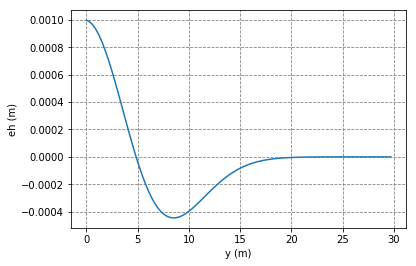

In [7]:
N=y.size #numero de puntos del vector y
eh=np.zeros(N-1) #definicion del tamaño del vector
for n in range(N-1):
    dy=y[n+1]-y[n]
    eh[n]=(Sh[n+1]-Sh[n])/dy
    
plt.plot(y[0:N-1],eh)
plt.xlabel('y (m)')
plt.ylabel('eh (m)')
plt.grid(color='grey', linestyle='--')

El asentamiento longitudinal se estima a partir del asentamiento máximo (Smax), la posición del punto de inflexión (i) y la posición del frente de avance (x=0). La función asume un asentamiento del 50% de Smax en la progresiva en donde se encuentra el frente de ataque. 
<img src="longitudinal.jpg" style="width:600px"/>

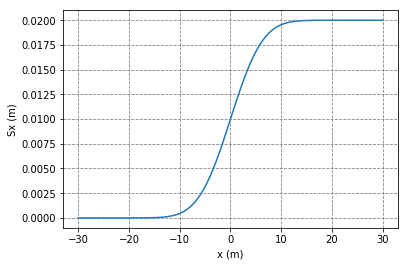

In [22]:
def func(x):
    return Smax/(i*np.sqrt(2*np.pi))*np.exp(-(x**2)/(2*i**2)) #funcion a integrar de -inf a x


x=np.linspace(-30.0, 30.0, num=100) #vector posición respecto al frente de ataque
N=x.size #numero de puntos del vector x

Sx=np.zeros(N) #definicion del tamaño del vector

for n in range(N):
    res=intg(func,-np.inf,x[n]) #la funcion de integración devuelve un vector con el resultado y el error
    Sx[n]=res[0] #almaceno el resultado

plt.plot(x,Sx)
plt.xlabel('x (m)')
plt.ylabel('Sx (m)')
plt.grid(color='grey', linestyle='--')

REFERENCIAS:

{1} R. Mair, R. Taylor y J. Burland, «Prediction of ground movements and assessment of risk of building damage due to bored tunnelling,» de Geotechnical aspectos of underground construction in soft ground, M. &. Taylor, Ed., Londres, Reino Unido, CRC Press, 1996, pp. 713-718.

{2} S. Möller, «Seccion 3.6.3,» de Tunnel induced settlements and structural forces in linings, Stuttgart, Alemania, 2006, pp. 22-24.